<h1> make_mode_plots </h1>
Some explanation text

Note: at the moment hard-coded to work with 3 eigenmodes

<h1> Packages </h1>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
#import pandas as pd
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

<h1> Load the computed eigenmodes </h1>

In [2]:
eigenmode_folder = "Data/fields/EigenmodesNOKERNEL/"

dtas_modes = xr.open_dataset(eigenmode_folder + "dtas_modes.nc")
dIMB_modes = xr.open_dataset(eigenmode_folder + "dIMB_modes.nc")
Planck_modes = xr.open_dataset(eigenmode_folder + "Planck_modes.nc")
LR_modes = xr.open_dataset(eigenmode_folder + "LR_modes.nc")
qLW_modes = xr.open_dataset(eigenmode_folder + "q_LW_modes.nc")
qSW_modes = xr.open_dataset(eigenmode_folder + "q_SW_modes.nc")
ALB_modes = xr.open_dataset(eigenmode_folder + "alb_modes.nc")

<h1> Functions to plot the modes </h1>

In [3]:
def plot_contour(axis, Y, title, c_levels):
    axis.add_feature(cfeature.COASTLINE, color = 'lightgray')
    data, plot_lon = add_cyclic_point(Y.values, Y['lon'])
    plot_data = xr.DataArray(data, coords = [Y['lat'], plot_lon], dims = ["lat", "lon"])
    handle = plot_data.plot.contourf(ax = axis, transform = ccrs.PlateCarree(), cmap = 'RdBu_r', levels = c_levels, extend = 'both', add_colorbar = False)
    title = title + " (tau = " + str(Y['tau'].values) + ")"
    plt.title(title, fontsize = 16)
    return handle

def plot_eigenmode(Y, suptitle, labeltext, c_levels, c_levels_ticks, file_name):
    fig = plt.figure(figsize = (20,20))
    
    fig.suptitle(suptitle, fontsize = 32)
        
    ax1 = plt.subplot(311, projection = ccrs.PlateCarree())
    h1 = plot_contour(ax1, Y['Eigenmodes'].isel(tau = 0), 'mode 1', c_levels)
    
    ax2 = plt.subplot(312, projection = ccrs.PlateCarree())
    h2 = plot_contour(ax2, Y['Eigenmodes'].isel(tau = 1), 'mode 2', c_levels)
    
    ax3 = plt.subplot(313, projection = ccrs.PlateCarree())
    h3 = plot_contour(ax3, Y['Eigenmodes'].isel(tau = 2), 'mode 3', c_levels)
        
    fig.subplots_adjust(wspace = -0.1)
    
    pos3 = ax3.get_position()
    pos2 = ax2.get_position()
    pos1 = ax1.get_position()
    cbar_ax = fig.add_axes([pos3.x1+0.02, pos3.y1, 0.01, (pos1.y0-pos3.y1)])
    cb = fig.colorbar(h1, cax = cbar_ax, orientation = 'vertical')
    cb.set_label(labeltext)
    cb.set_ticks(c_levels_ticks)
    cb.ax.tick_params(labelsize = 8)
    
    plt.savefig(file_name)

C:\Users\robbi\.conda\envs\cmipstudy\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


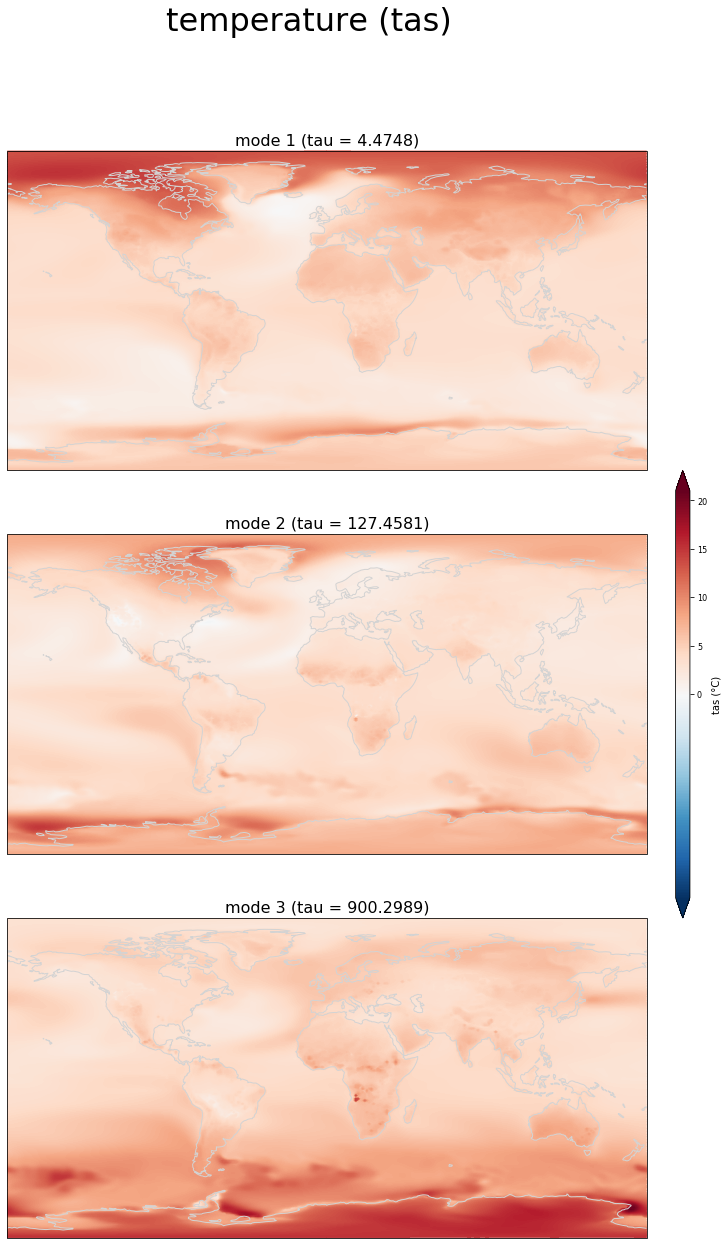

In [4]:
c_levels = np.linspace(-21, 21, 256)
c_levels_ticks = np.array([0, 5, 10, 15, 20])
plot_eigenmode(dtas_modes, 'temperature (tas)', 'tas (°C)', c_levels, c_levels_ticks, 'tas_modes.png')

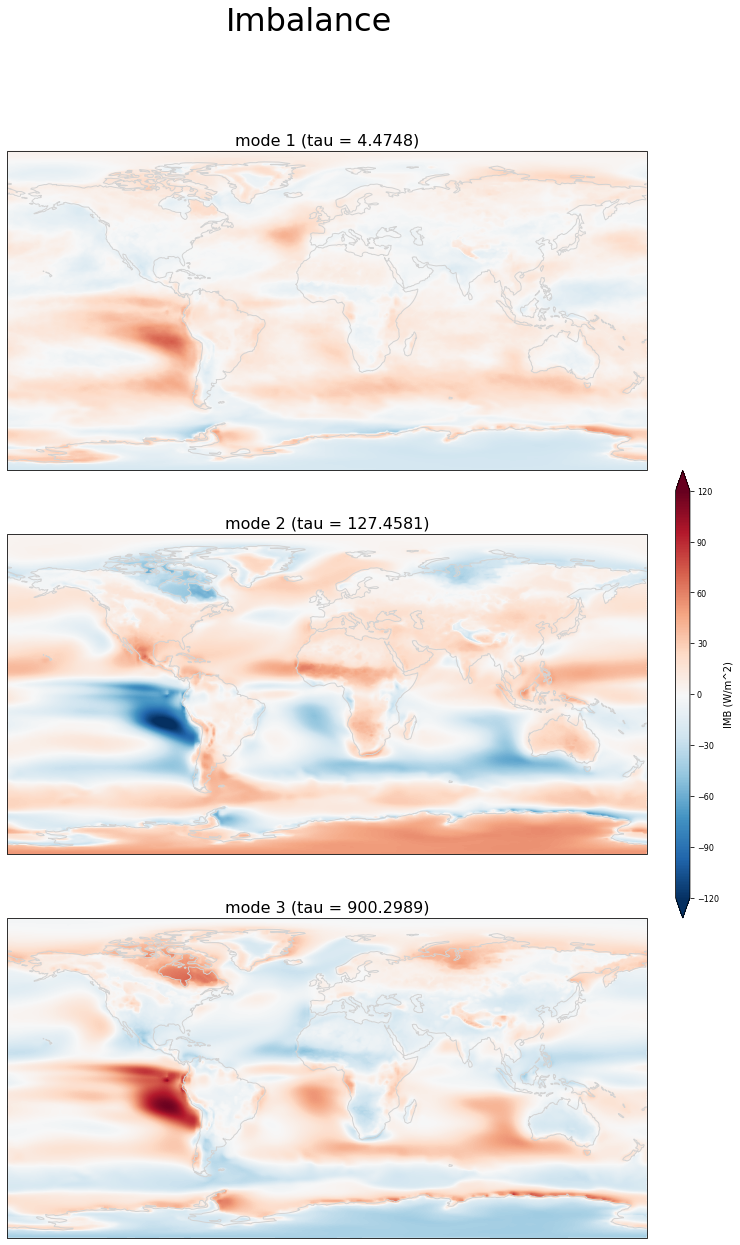

In [5]:
c_levels = np.linspace(-120, 120, 256)
c_levels_ticks = np.array([-120, -90, -60, -30, 0, 30, 60, 90, 120])
plot_eigenmode(dIMB_modes, 'Imbalance', 'IMB (W/m^2)', c_levels, c_levels_ticks, 'IMB_modes.png')

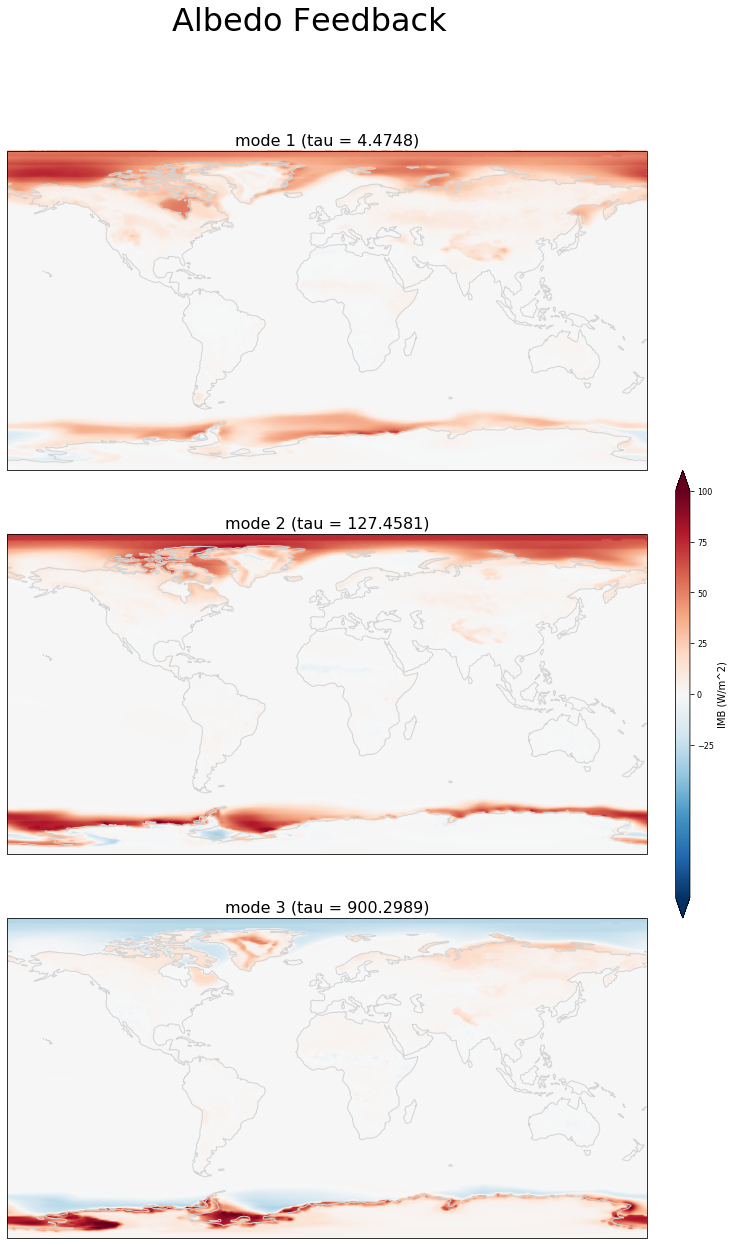

In [6]:
c_levels = np.linspace(-100, 100, 256)
c_levels_ticks = np.array([-25, 0, 25, 50, 75, 100])
plot_eigenmode(ALB_modes, 'Albedo Feedback', 'IMB (W/m^2)', c_levels, c_levels_ticks, 'ALB_modes.png')

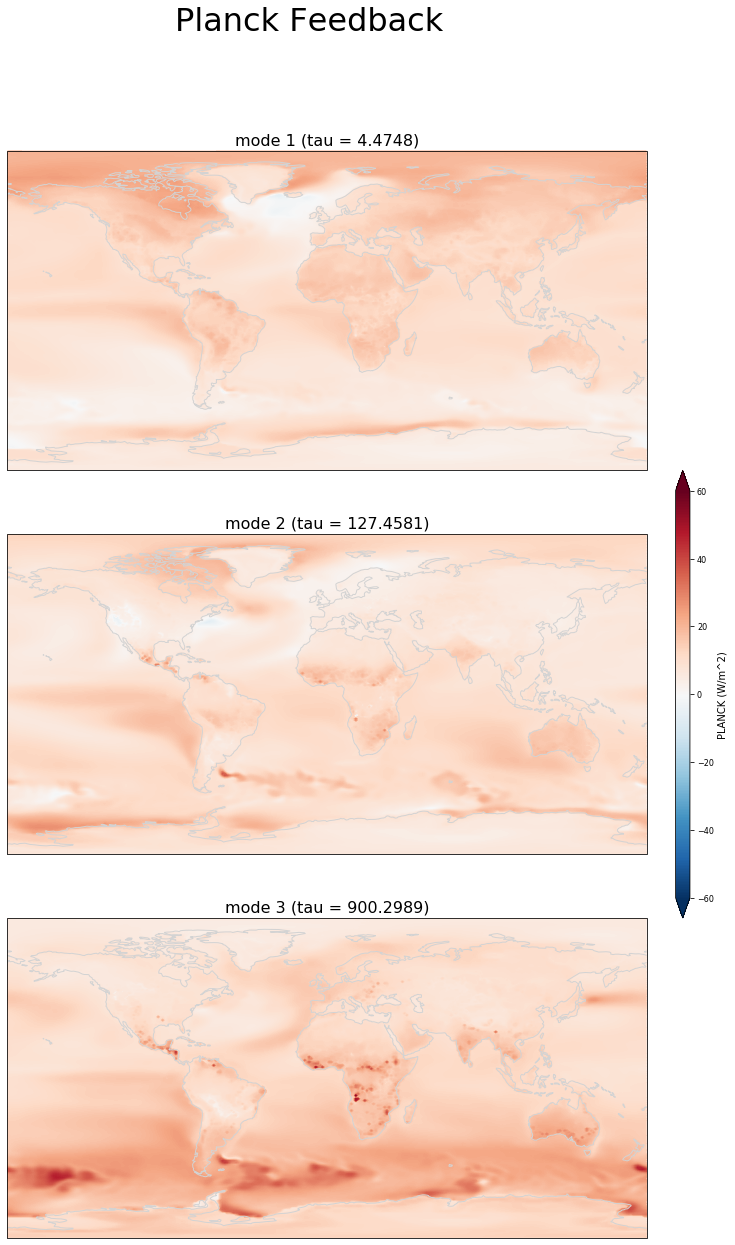

In [7]:
c_levels = np.linspace(-60, 60, 256)
c_levels_ticks = np.array([-60, -40, -20, 0, 20, 40, 60])
plot_eigenmode(Planck_modes, 'Planck Feedback', 'PLANCK (W/m^2)', c_levels, c_levels_ticks, 'Planck_modes.png')

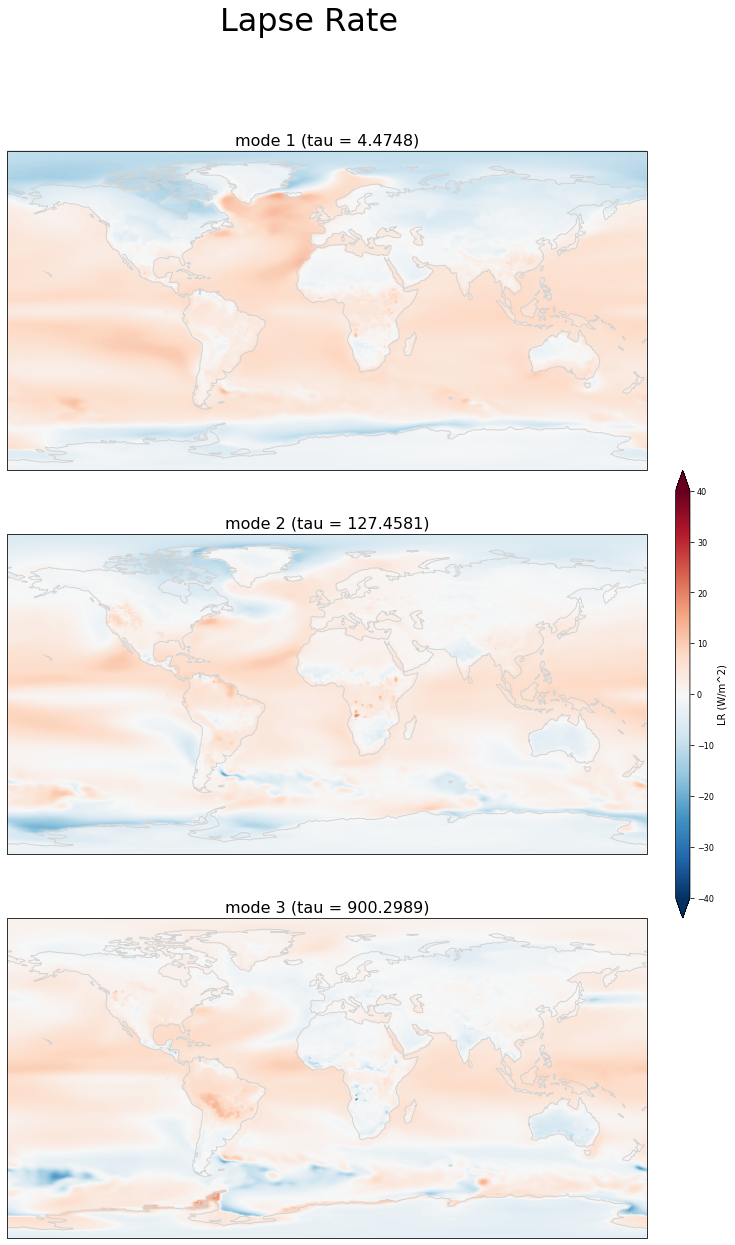

In [8]:
c_levels = np.linspace(-40, 40, 256)
c_levels_ticks = np.array([-40, -30, -20, -10, 0, 10, 20, 30, 40])
plot_eigenmode(LR_modes, 'Lapse Rate', 'LR (W/m^2)', c_levels, c_levels_ticks, 'LR_modes.png')

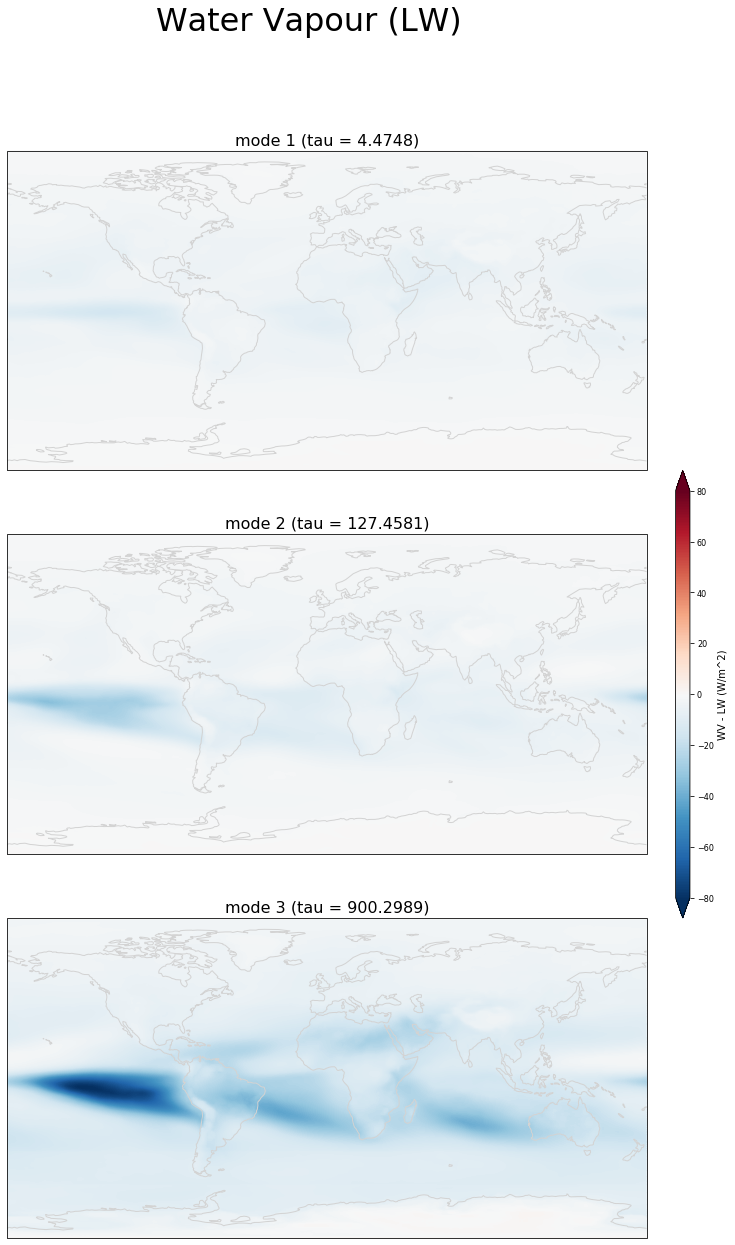

In [9]:
c_levels = np.linspace(-80,80, 256)
c_levels_ticks = np.array([-80, -60, -40, -20, 0, 20, 40, 60, 80])
plot_eigenmode(qLW_modes, 'Water Vapour (LW)', 'WV - LW (W/m^2)', c_levels, c_levels_ticks, 'WV-LW_modes.png')

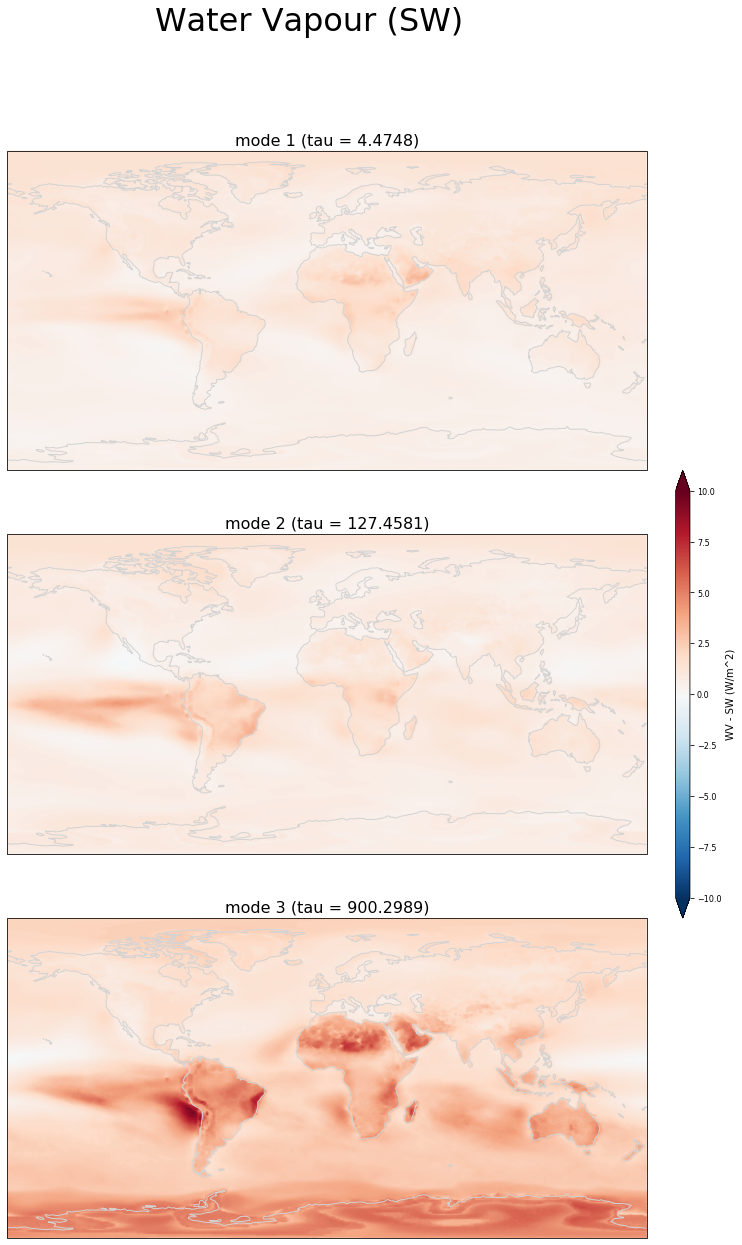

In [10]:
c_levels = np.linspace(-10,10,256)
c_levels_ticks = np.array([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10])
plot_eigenmode(qSW_modes, 'Water Vapour (SW)', 'WV - SW (W/m^2)', c_levels, c_levels_ticks, 'WV-SW_modes.png')

<h1> Function to plot the Equilibrium Configurations </h1>

In [61]:
def plot_equilibrium(Z, title, labeltext, c_levels, c_levels_ticks, file_name):
    fig = plt.figure(figsize = (20,20))
    
    Z1 = Z['Eigenmodes'].isel(tau = 0)
    Z2 = Z['Eigenmodes'].isel(tau = 1)
    Z3 = Z['Eigenmodes'].isel(tau = 2)
    
    Y = Z1 + Z2 + Z3   
                
    ax1 = plt.subplot(311, projection = ccrs.PlateCarree())
    ax1.add_feature(cfeature.COASTLINE, color = 'lightgray')
    data, plot_lon = add_cyclic_point(Y.values, Y['lon'])
    plot_data = xr.DataArray(data, coords = [Y['lat'], plot_lon], dims = ["lat", "lon"])
    handle = plot_data.plot.contourf(ax = ax1, transform = ccrs.PlateCarree(), cmap = 'RdBu_r', levels = c_levels, extend = 'both', add_colorbar = False)
    plt.title(title, fontsize = 16)
        
    fig.subplots_adjust(wspace = -0.1)
    
    pos = ax1.get_position()
    cbar_ax = fig.add_axes([pos.x1+0.02, pos.y0, 0.01, (pos.y1-pos.y0)])
    cb = fig.colorbar(handle, cax = cbar_ax, orientation = 'vertical')
    cb.set_label(labeltext)
    cb.set_ticks(c_levels_ticks)
    cb.ax.tick_params(labelsize = 8)
    
    plt.savefig(file_name)

C:\Users\robbi\.conda\envs\cmipstudy\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


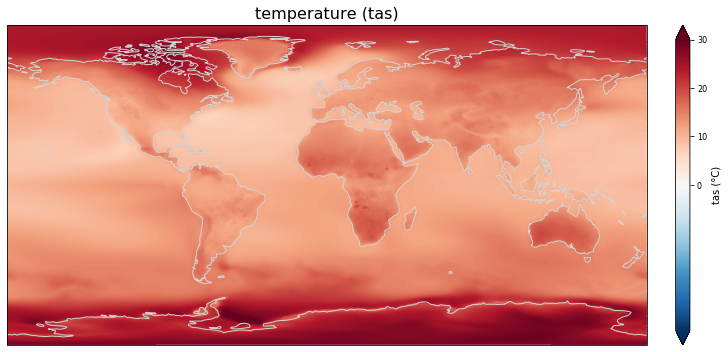

In [62]:
c_levels = np.linspace(-30, 30, 256)
c_levels_ticks = np.array([0, 10, 20, 30])
plot_equilibrium(dtas_modes, 'temperature (tas)', 'tas (°C)', c_levels, c_levels_ticks, 'tas_eq.png')

C:\Users\robbi\.conda\envs\cmipstudy\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


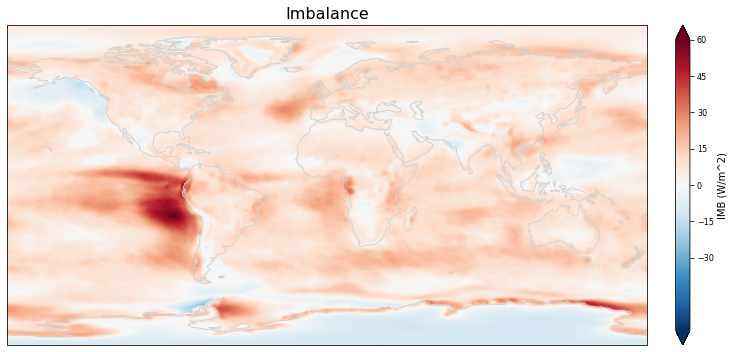

In [63]:
c_levels = np.linspace(-60, 60, 256)
c_levels_ticks = np.array([-30, -15, 0, 15, 30, 45, 60])
plot_equilibrium(dIMB_modes, 'Imbalance', 'IMB (W/m^2)', c_levels, c_levels_ticks, 'IMB_initial.png')

C:\Users\robbi\.conda\envs\cmipstudy\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


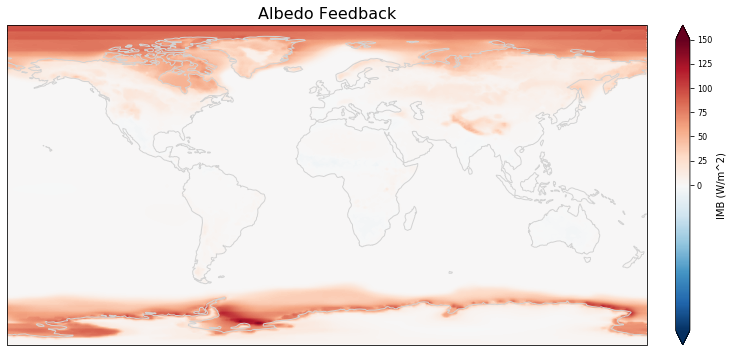

In [64]:
c_levels = np.linspace(-150, 150, 256)
c_levels_ticks = np.array([0, 25, 50, 75, 100, 125, 150])
plot_equilibrium(ALB_modes, 'Albedo Feedback', 'IMB (W/m^2)', c_levels, c_levels_ticks, 'ALB_eq.png')

C:\Users\robbi\.conda\envs\cmipstudy\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


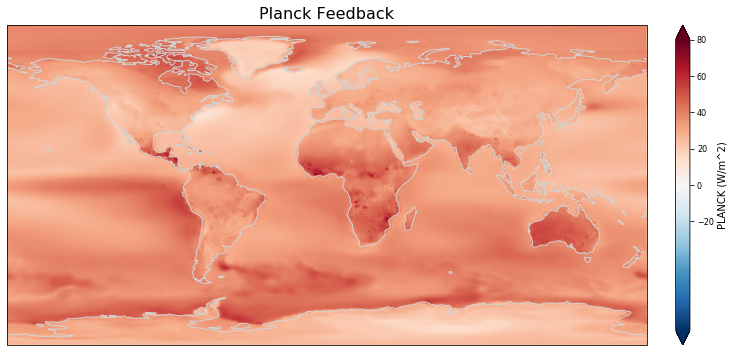

In [65]:
c_levels = np.linspace(-80, 80, 256)
c_levels_ticks = np.array([-20, 0, 20, 40, 60, 80])
plot_equilibrium(Planck_modes, 'Planck Feedback', 'PLANCK (W/m^2)', c_levels, c_levels_ticks, 'Planck_eq.png')

C:\Users\robbi\.conda\envs\cmipstudy\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


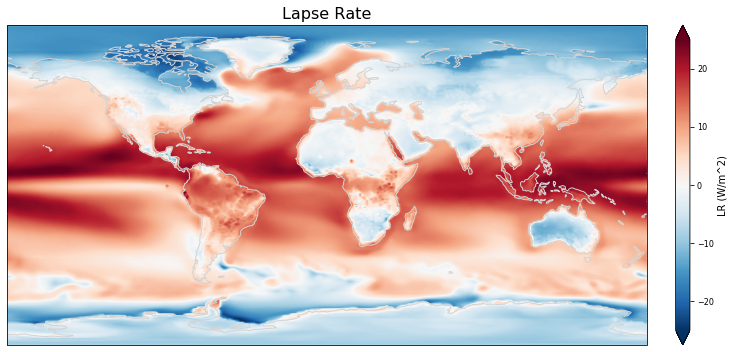

In [66]:
c_levels = np.linspace(-25, 25, 256)
c_levels_ticks = np.array([-30, -20, -10, 0, 10, 20, 30])
plot_equilibrium(LR_modes, 'Lapse Rate', 'LR (W/m^2)', c_levels, c_levels_ticks, 'LR_eq.png')

C:\Users\robbi\.conda\envs\cmipstudy\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


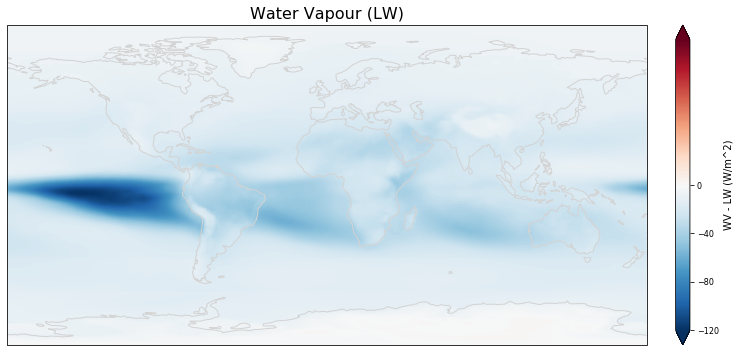

In [67]:
c_levels = np.linspace(-120, 120, 256)
c_levels_ticks = np.array([-120, -80, -40, 0])
plot_equilibrium(qLW_modes, 'Water Vapour (LW)', 'WV - LW (W/m^2)', c_levels, c_levels_ticks, 'WV-LW_eq.png')

C:\Users\robbi\.conda\envs\cmipstudy\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


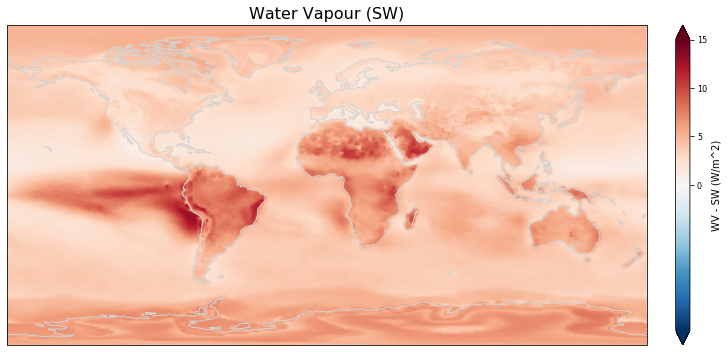

In [68]:
c_levels = np.linspace(-15, 15,256)
c_levels_ticks = np.array([0, 5, 10, 15])
plot_equilibrium(qSW_modes, 'Water Vapour (SW)', 'WV - SW (W/m^2)', c_levels, c_levels_ticks, 'WV-SW_eq.png')